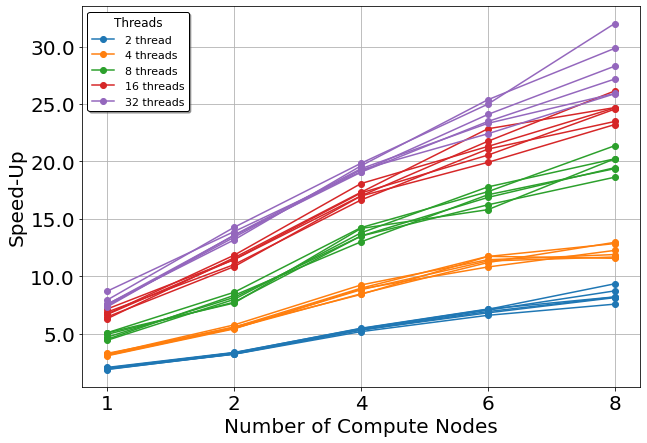

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import FixedLocator
import warnings
warnings.filterwarnings("ignore")


execution_time_df = pd.read_csv('execution_time_BMOR.csv')
reference_time_df = pd.read_csv('reference_time.csv')

# Extract B_MOR execution times
execution_time = []
for index, row in execution_time_df.iterrows():
    thread_times = []
    for col in execution_time_df.columns[1:]:
        thread_times.append(np.array([int(x) for x in row[col].split()]))
    execution_time.append(thread_times)

execution_time = np.array(execution_time)

# Extract reference execution times
reference_execution_times = reference_time_df['Reference Time'].values.tolist()

data = execution_time 
thread_colors = list(mcolors.TABLEAU_COLORS.values())[:5]  # Select the first 5 colors 

# Speedup data calculation
speedup_data = np.zeros_like(data, dtype=float)
for i in range(len(data)):
    for j in range(len(data[i])):
        speedup_data[i][j] = reference_execution_times[i] / data[i][j]

# Plotting
fig1, ax1 = plt.subplots(figsize=(10, 7))

legend_labels = ['2 thread', '4 threads', '8 threads', '16 threads', '32 threads']
legend_handles = []
for i, thread_count in enumerate([2, 4, 8, 16, 32]):
    for j in range(len(speedup_data)):
        x_values = np.arange(len(speedup_data[j][i]))
        y_values = speedup_data[j][i]
        ax1.errorbar(x_values, y_values, yerr=0,
                     color=thread_colors[i],
                     linestyle='-', marker='o')
   
    legend_handles.append(ax1.plot([], [], linestyle='-', marker='o', color=thread_colors[i])[0])

ax1.set_xlabel('Number of Compute Nodes', fontsize=20)
ax1.set_ylabel('Speed-Up', fontsize=20)
ax1.set_xticks(np.arange(len(speedup_data[0][0])))
ax1.set_xticklabels([1, 2, 4, 6, 8], fontsize=20)
ax1.set_yticklabels(ax1.get_yticks(), fontsize=20)
ax1.grid(True)


ax1.yaxis.set_major_locator(FixedLocator(ax1.get_yticks()))

ax1.legend(legend_handles, legend_labels, loc='upper left', fontsize=11,
           title='Threads', title_fontsize='12', fancybox=True, shadow=True, facecolor='white', edgecolor='black',
           handletextpad=1, bbox_to_anchor=(0.0, 1.0))

plt.show()


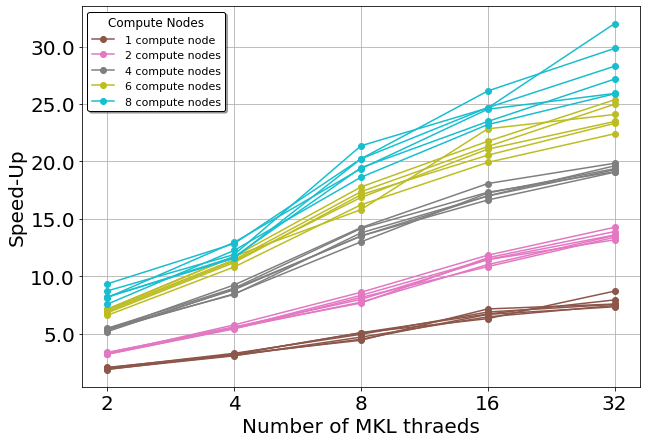

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import warnings
warnings.filterwarnings("ignore")

execution_time_df = pd.read_csv('execution_time_BMOR.csv')
reference_time_df = pd.read_csv('reference_time.csv')

# Extract  execution times
execution_time = []
for index, row in execution_time_df.iterrows():
    thread_times = []
    for col in execution_time_df.columns[1:]:
        thread_times.append(np.array([int(x) for x in row[col].split()]))
    execution_time.append(thread_times)

execution_time = np.array(execution_time)

# Extract reference execution times
reference_execution_times = reference_time_df['Reference Time'].values.tolist()
data = execution_time 
compute_node_colors = list(mcolors.TABLEAU_COLORS.values())[5:10]  

# Speedup data calculation
speedup_data = np.zeros_like(data, dtype=float)
for i in range(len(data)):
    for j in range(len(data[i])):
        speedup_data[i][j] = reference_execution_times[i] / data[i][j]

# Plotting
fig2, ax2 = plt.subplots(figsize=(10, 7))

legend_labels = ['1 compute node', '2 compute nodes', '4 compute nodes', '6 compute nodes', '8 compute nodes']
legend_handles = []
for i, worker_count in enumerate([1, 2, 4, 6, 8]):
    for j in range(len(speedup_data)):
        x_values = np.arange(len(speedup_data[j][:, i]))
        y_values = speedup_data[j][:, i]
        if worker_count == 1:
            label = f"{worker_count} compute node"
        else:
            label = f"{worker_count} compute nodes"
        ax2.errorbar(x_values, y_values, yerr=0,
                     color=compute_node_colors[i],
                     linestyle='-', marker='o', label=label)  
    legend_handles.append(ax2.plot([], [], linestyle='-', marker='o', color=compute_node_colors[i])[0])

ax2.set_xlabel('Number of MKL thraeds', fontsize=20)
ax2.set_ylabel('Speed-Up', fontsize=20)
ax2.set_xticks(np.arange(len(speedup_data[0])))
ax2.set_xticklabels([2, 4, 8, 16, 32], fontsize=20)
ax2.set_yticklabels(ax2.get_yticks(), fontsize=20)  
ax2.grid(True)

ax2.legend(legend_handles, legend_labels, loc='upper left', fontsize=11,
           title='Compute Nodes', title_fontsize='12', fancybox=True, shadow=True, facecolor='white',
           edgecolor='black', handletextpad=1, bbox_to_anchor=(0.0, 1.0))

plt.show()
